## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).


In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv("S:\\ProgrammierenResourcen\\Data-Science-For-Beginners-main\\1-Introduction\\04-stats-and-probability\\DiabetesData\\diabetes.tab.txt",sep='\t')

# Calculate mean and standard deviation
mean_values = df.mean(numeric_only=True)
std_values = df.std(numeric_only=True)
variance_values = df.var(numeric_only=True)

# Calculate RSD (Coefficient of Variation)
rsd_values = (std_values / mean_values) * 100

# Combine into a tidy DataFrame
rsd_df = pd.DataFrame({
    'Mean': mean_values,
    'Variance': variance_values,
    'Std Dev': std_values,
    'RSD (%)': rsd_values
})

rsd_df



,Mean,Variance,Std Dev,RSD (%)
AGE,48.518100,171.846610,13.109028,27.018840
SEX,1.468326,0.249561,0.499561,34.022502
BMI,26.375792,19.519798,4.418122,16.750669
BP,94.647014,191.304401,13.831283,14.613544
S1,189.140271,1197.717241,34.608052,18.297558
S2,115.439140,924.955494,30.413081,26.345554
S3,49.788462,167.293585,12.934202,25.978313
S4,4.070249,1.665261,1.290450,31.704447
S5,4.641411,0.272892,0.522391,11.254995
S6,91.260181,132.165712,11.496335,12.597317


### Task 2: Plot boxplots for BMI, BP and Y depending on gender

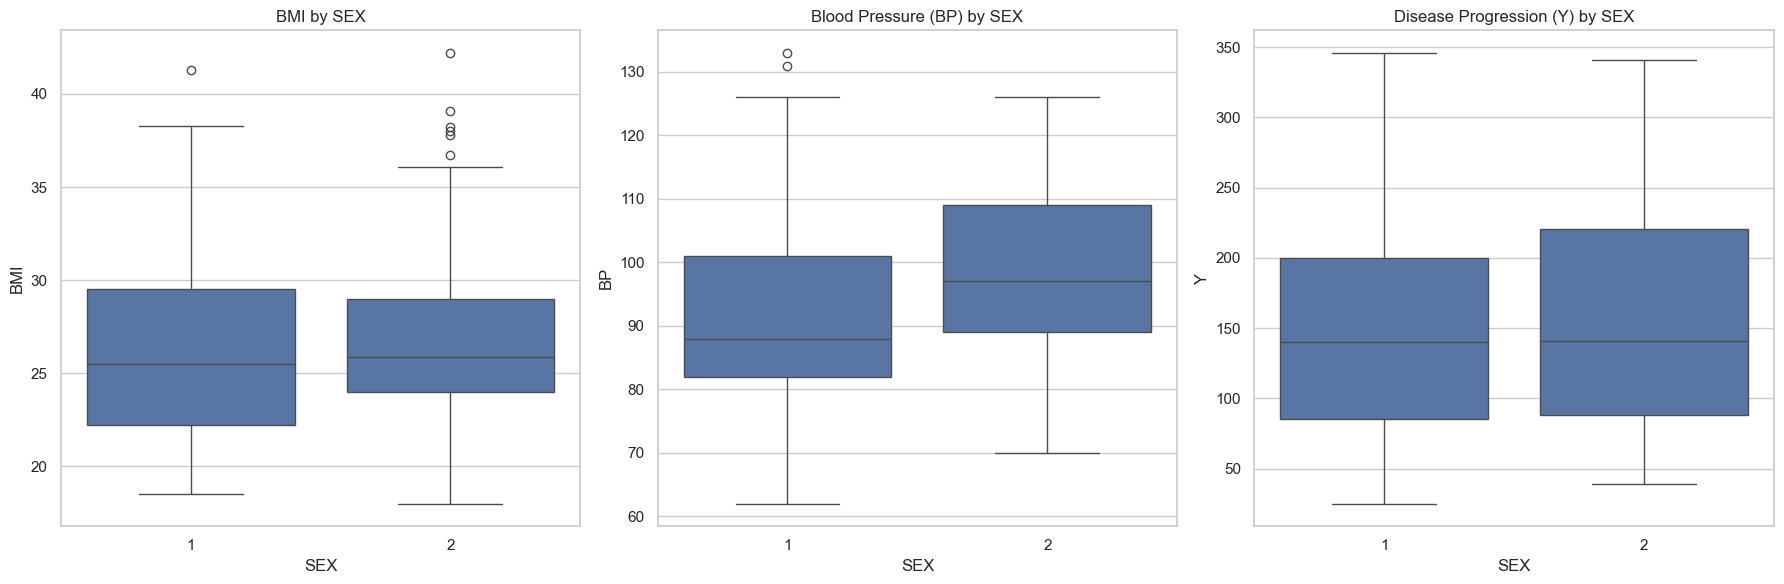

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("S:\\ProgrammierenResourcen\\Data-Science-For-Beginners-main\\1-Introduction\\04-stats-and-probability\\DiabetesData\\diabetes.tab.txt",sep='\t')

# Set the visual style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot for BMI vs SEX
sns.boxplot(data=df, x='SEX', y='BMI', ax=axes[0])
axes[0].set_title('BMI by SEX')

# Boxplot for BP vs SEX
sns.boxplot(data=df, x='SEX', y='BP', ax=axes[1])
axes[1].set_title('Blood Pressure (BP) by SEX')

# Boxplot for Y vs SEX
sns.boxplot(data=df, x='SEX', y='Y', ax=axes[2])
axes[2].set_title('Disease Progression (Y) by SEX')

# Improve layout
plt.tight_layout()
plt.show()


### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

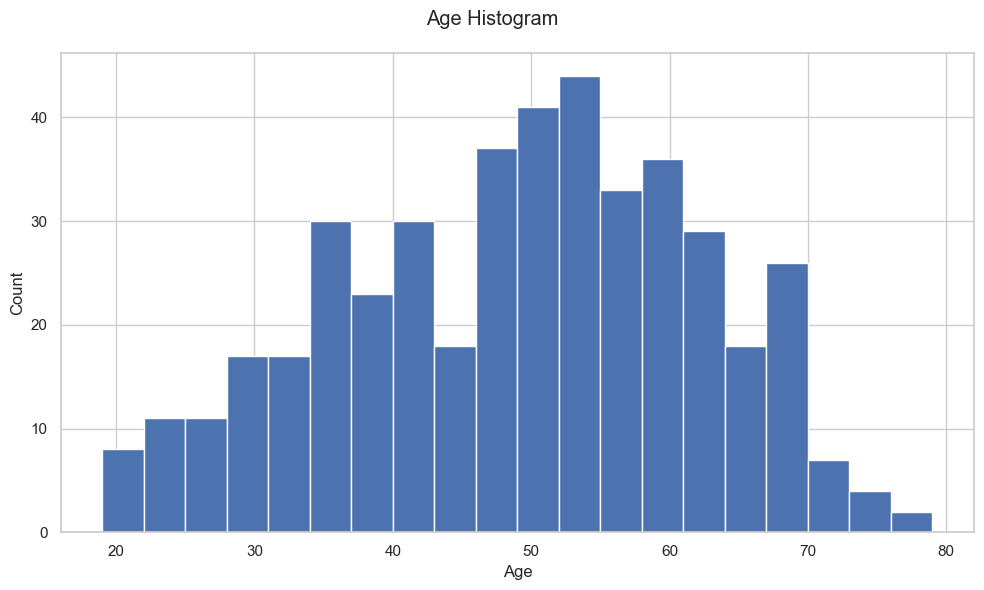

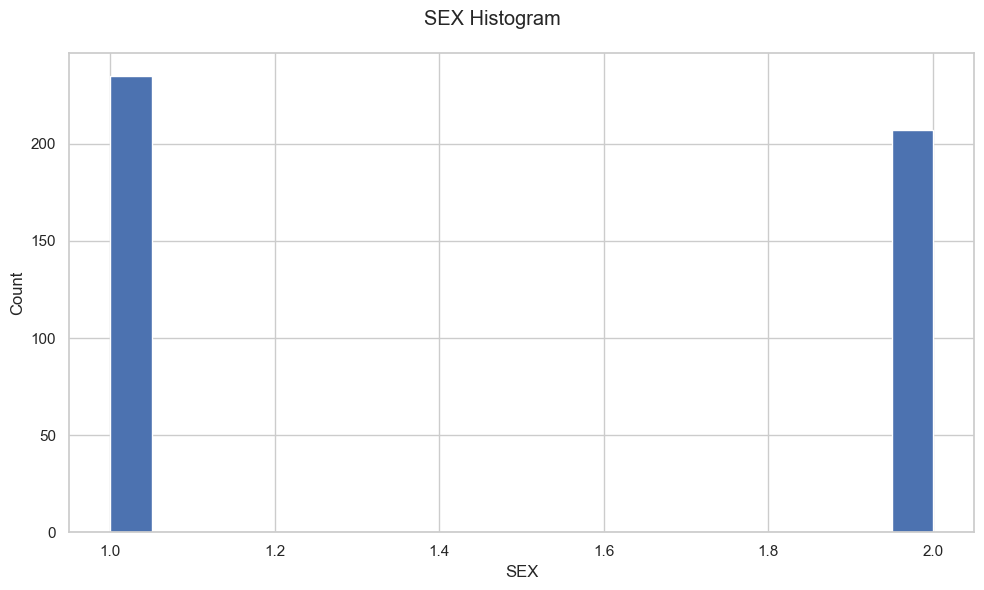

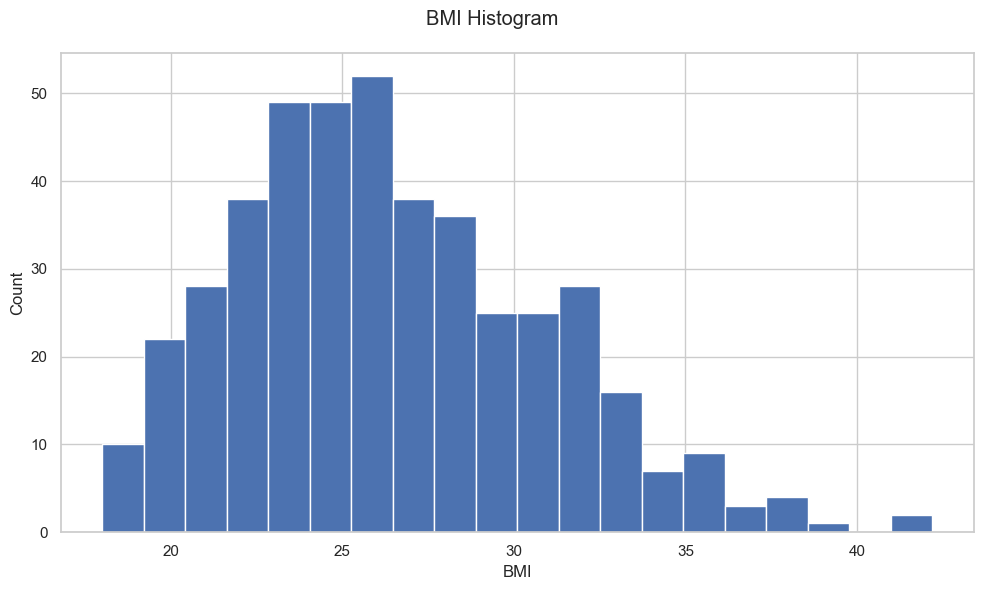

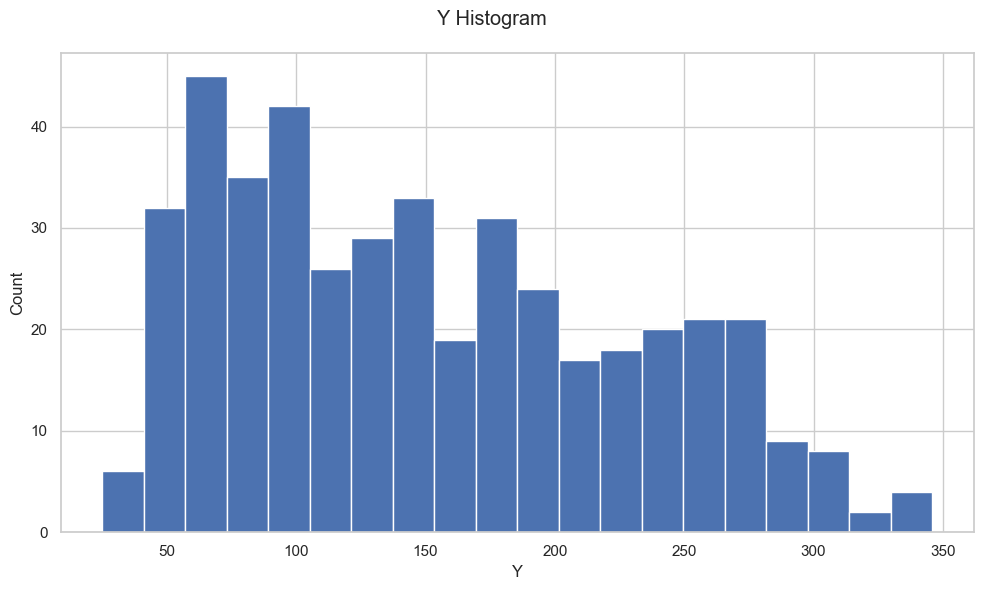

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("S:\\ProgrammierenResourcen\\Data-Science-For-Beginners-main\\1-Introduction\\04-stats-and-probability\\DiabetesData\\diabetes.tab.txt",sep='\t')

df['AGE'].hist(bins=20, figsize=(10,6))
plt.suptitle('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

df['SEX'].hist(bins=20, figsize=(10,6))
plt.suptitle('SEX Histogram')
plt.xlabel('SEX')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

df['BMI'].hist(bins=20, figsize=(10,6))
plt.suptitle('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

df['Y'].hist(bins=20, figsize=(10,6))
plt.suptitle('Y Histogram')
plt.xlabel('Y')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("S:\\ProgrammierenResourcen\\Data-Science-For-Beginners-main\\1-Introduction\\04-stats-and-probability\\DiabetesData\\diabetes.tab.txt",sep='\t')

corr_matrix = df.corr(numeric_only=True)

y_corr = corr_matrix['Y'].sort_values(ascending=False)
print("Correlation of each variable with disease progression (Y):")
print(y_corr)

Correlation of each variable with disease progression (Y):
Y      1.000000
BMI    0.586450
S5     0.565883
BP     0.441482
S4     0.430453
S6     0.382483
S1     0.212022
AGE    0.187889
S2     0.174054
SEX    0.043062
S3    -0.394789
Name: Y, dtype: float64


### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [19]:
from scipy import stats
df = pd.read_csv("S:\\ProgrammierenResourcen\\Data-Science-For-Beginners-main\\1-Introduction\\04-stats-and-probability\\DiabetesData\\diabetes.tab.txt",sep='\t')

# Split Y values by sexist parameter
y_male = df[df['SEX'] == 1]['Y']
y_female = df[df['SEX'] == 2]['Y']

# Perform an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(y_male, y_female, equal_var=False)

print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.5f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in diabetes progression between men and women.")
else:
    print("Fail to reject the null hypothesis: No significant difference in diabetes progression between men and women.")


t-statistic: -0.902
p-value: 0.36744
Fail to reject the null hypothesis: No significant difference in diabetes progression between men and women.
